<a href="https://colab.research.google.com/github/Anny8910/Detection-of-COVID-19-from-X-ray-images/blob/master/Dataset_Creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
import pandas as pd
import os
import shutil

In [ ]:
#Sampling of COVID-19 dataset

FILE_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/covid-chestxray-dataset-master/covid-chestxray-dataset-master/metadata.csv"
IMAGE_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images"

In [ ]:
df=pd.read_csv(FILE_PATH)
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [ ]:
df.shape

(930, 29)

In [ ]:

TARGET_DIR="/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset/Covid"
if not os.path.exists(TARGET_DIR):
  os.mkdir(TARGET_DIR)
  print("COVID folder created")


In [ ]:

count=0
for (i,row) in df.iterrows():
  if row["finding"]=="COVID-19" and row["view"]=="PA":
    filename=row['filename']
    image_path=os.path.join(IMAGE_PATH,filename)
    image_copy_path=os.path.join(TARGET_DIR,filename)
    shutil.copy2(image_path,image_copy_path)
    #print("Moving image",count)
    count+=1

In [ ]:
#Sampling of Normal dataset(images) from Kaggle

import random
KAGGLE_FILE_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/chest_xray/train/NORMAL"
TARGET_NORMAL_DIR="/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset/Normal"



In [ ]:
image_names=os.listdir(KAGGLE_FILE_PATH)

In [ ]:

random.shuffle(image_names)

In [10]:
for i in range(180):
  image_name=image_names[i]
  image_path=os.path.join(KAGGLE_FILE_PATH,image_name)
  target_path=os.path.join(TARGET_NORMAL_DIR,image_name)
  shutil.copy2(image_path,target_path)
  #print("Copying image", i)

In [11]:
root_dir = '/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset'
posCls = '/Covid'
negCls = '/Normal'

if not os.path.exists(root_dir):
  os.makedirs(root_dir +'/train' + posCls)
  os.makedirs(root_dir +'/train' + negCls)
  os.makedirs(root_dir +'/val' + posCls)
  os.makedirs(root_dir +'/val' + negCls)


In [12]:
import numpy as np
currentCls = posCls
src = "/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset"+currentCls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
print(len(allFileNames))
train_FileNames, val_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*0.8)])

import numpy as np
currentCls1 = negCls
src1 = "/content/drive/My Drive/Colab Notebooks/COVID-19/Dataset"+currentCls1 # Folder to copy images from

allFileNames1 = os.listdir(src1)
np.random.shuffle(allFileNames1)
print(len(allFileNames1))
train_FileNames1, val_FileNames1 = np.split(np.array(allFileNames1), [int(len(allFileNames1)*0.8)])



180
584


In [13]:
train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
#test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
#print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train"+currentCls)

for name in val_FileNames:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val"+currentCls)


Total images:  180
Training:  144
Validation:  36


In [ ]:
train_FileNames1 = [src1+'/'+ name for name in train_FileNames1.tolist()]
val_FileNames1 = [src1+'/' + name for name in val_FileNames1.tolist()]
#test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames1))
print('Training: ', len(train_FileNames1))
print('Validation: ', len(val_FileNames1))
#print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames1:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train"+currentCls1)

for name in val_FileNames1:
    shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val"+currentCls1)

#for name in test_FileNames:
 #   shutil.copy(name, "/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/test"+currentCls)

Total images:  584
Training:  467
Validation:  117


In [ ]:
TRAIN_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train"
VAL_PATH="/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val"

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras_preprocessing import image

In [ ]:
#CNN Based Model in Keras

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#Train

train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
   '/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/train',
   target_size=(224,224),
   batch_size=32,
   class_mode='binary' 
)

In [ ]:
train_generator.class_indices

In [ ]:
validation_generator=test_dataset.flow_from_directory(
   '/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val',
   target_size=(224,224),
   batch_size=32,
   class_mode='binary' 
)

In [226]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)


Epoch 1/10
8/8 [==============================] - 72s 9s/step - loss: 0.8539 - accuracy: 0.5664 - val_loss: 0.6805 - val_accuracy: 0.5469
Epoch 2/10
8/8 [==============================] - 68s 9s/step - loss: 0.5553 - accuracy: 0.7148 - val_loss: 0.5341 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 69s 9s/step - loss: 0.4240 - accuracy: 0.7773 - val_loss: 0.3343 - val_accuracy: 0.9688
Epoch 4/10
8/8 [==============================] - 68s 9s/step - loss: 0.3349 - accuracy: 0.8658 - val_loss: 0.2881 - val_accuracy: 0.9375
Epoch 5/10
8/8 [==============================] - 68s 9s/step - loss: 0.2648 - accuracy: 0.9219 - val_loss: 0.2131 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 61s 8s/step - loss: 0.2617 - accuracy: 0.8745 - val_loss: 0.2239 - val_accuracy: 0.9531
Epoch 7/10
8/8 [==============================] - 63s 8s/step - loss: 0.2030 - accuracy: 0.9221 - val_loss: 0.1828 - val_accuracy: 0.9375
Epoch 8/10
8/8 [==================

In [227]:
model.save("model_adv.h5")


In [228]:
model.evaluate_generator(train_generator)

[0.12626732885837555, 0.9571183323860168]

In [229]:
model.evaluate_generator(validation_generator)

[0.10332807898521423, 0.9735449552536011]

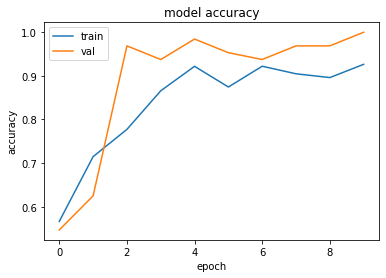

In [230]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [231]:
model=load_model("model_adv.h5")
y_actual = []
y_test = []

In [232]:
for i in os.listdir('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Normal'):
  img1 = image.load_img('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Normal/'+i, target_size=(224,224))
  img1 = image.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  p = model.predict_classes(img1)
  y_test.append(p[0,0])
  y_actual.append(1)


In [233]:
for i in os.listdir('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Covid'):
  img = image.load_img('/content/drive/My Drive/Colab Notebooks/COVID-19/COVID Dataset/val/Covid/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [234]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [235]:
y_actual, y_test

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [236]:
from sklearn.metrics import confusion_matrix

In [237]:
cm = confusion_matrix(y_actual, y_test)

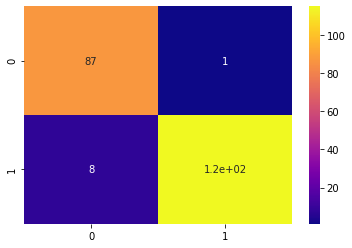

In [238]:
import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)